<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Visualización y limpieza con Pandas

Visualización de los datos del dataset iris\
v1.1

<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/iris_dataset.png" width="1000" align="center"></a>

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from  sklearn import  datasets

# Recolectar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle"></div>

In [2]:
iris=datasets.load_iris()
df_data = pd.DataFrame(data= iris.data, columns= iris.feature_names)
df_target = pd.DataFrame(data= iris.target, columns= ['species'])
print(df_data.head())
print(df_target.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
   species
0        0
1        0
2        0
3        0
4        0


In [5]:
# Generar una copia de df_target llamada "df_target_categorical" en el cual se almacenará los tipos de iris como variables categóricas (texto)
df_target_categorical = df_target.copy()

# Procesar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle"></div>

In [3]:
# Alumno: Utilizar apply y lambda expresion sobre df_target para modificar la columna "species" de df_target_categorical
# la lambda debe devolver:
# setosa --> si species = 0
# versicolor --> si species = 1
# virginica --> si species = 2

# Tip:
# df_target_categorical['species'] = df_target.apply(lambda...... 

In [6]:
df_target_categorical['species'] = df_target.apply(lambda x : 'setosa' if x["species"]==0 else 'versicolor' if x["species"]==1 else 'virginica'if x["species"]==2 else None, axis=1)
df_target_categorical

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [7]:
# Alumno: Observar las primeras filas del nuevo df_target_categorical para corroborar que haya sido correcto el cambio
df_target_categorical.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [ ]:
# Alumno: Contar cuantas especies de iris hay de cada una en el dataset df_target_categorical

In [8]:
iris= df_target_categorical['species'].value_counts()
iris

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [9]:
# Concatenar ambos dataset
df = pd.concat([df_data, df_target_categorical], axis= 1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Alumno: Analice si hay elementos incompletos en el dataset "df_data"

In [10]:
des = df_data.describe() 
des.loc['Nan'] = df_data.isna().sum()
des.loc['%Nan'] = (df_data.isna().mean())*100

des

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
Nan,0.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,0.000000


In [11]:
# Alumno: ¿Cuántas filas/datos hay para analizar?
# print(....)

In [12]:
print("Los datos a analizar",df_data.shape)

Los datos a analizar (150, 4)


# Explorar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle"></div>

In [ ]:
# Alumno, separe el dataset "df" en un dataset por tipo de iris
# df_setosa = ...
# df_versicolor = ...
# df_verginica = ...

In [13]:
groups = df.groupby(df['species'])

df_setosa = groups.get_group('setosa')
df_versicolor = groups.get_group('versicolor')
df_virginica = groups.get_group('virginica')

df_setosa, df_versicolor, df_virginica

(    sepal length (cm)  sepal width (cm)  ...  petal width (cm)  species
 0                 5.1               3.5  ...               0.2   setosa
 1                 4.9               3.0  ...               0.2   setosa
 2                 4.7               3.2  ...               0.2   setosa
 3                 4.6               3.1  ...               0.2   setosa
 4                 5.0               3.6  ...               0.2   setosa
 5                 5.4               3.9  ...               0.4   setosa
 6                 4.6               3.4  ...               0.3   setosa
 7                 5.0               3.4  ...               0.2   setosa
 8                 4.4               2.9  ...               0.2   setosa
 9                 4.9               3.1  ...               0.1   setosa
 10                5.4               3.7  ...               0.2   setosa
 11                4.8               3.4  ...               0.2   setosa
 12                4.8               3.0  ...      

In [ ]:
# Almuno: Realizar una función que reciba un dataframe como parámetro y grafique
# la relación (scatter plot) entre "petal length (cm)" (x) y "petal width (cm)" (y) de la especie setosa

In [14]:
def plot_petal(df, title,color1):
  fig = plt.figure()
  ax = fig.add_subplot()
  ax.scatter(df['petal length (cm)'], df['petal width (cm)'], label= title, c= color1)
  ax.legend()

In [ ]:
# Almuno: Utilizar la función generada para graficar la relación con dada dataframe de cada especie

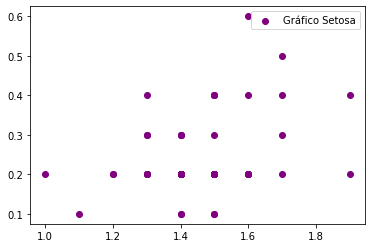

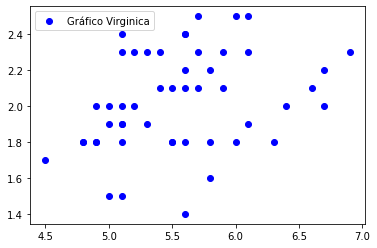

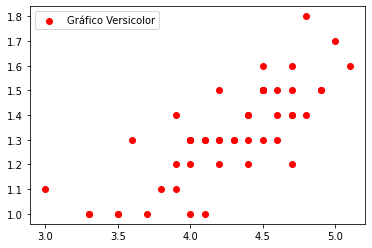

In [17]:
plot_petal(df_setosa, 'Gráfico Setosa','purple')
plot_petal(df_virginica, 'Gráfico Virginica','b')
plot_petal(df_versicolor, 'Gráfico Versicolor','r')